In [86]:
import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline
%precision 3
np.set_printoptions(precision=3)
import pylab as pl

In [87]:
X=pd.read_csv('typologia_Bajena1.csv', index_col=0)
df = pd.DataFrame(X)
df.head()

,"[person=""(pri)""]","[person=""(sec)""]","[case=""(nom)""]","[case=""(gen)""]","[case=""(dat)""]","[case=""(acc)""]","[case=""(inst)""]","[case=""(loc)""]","[case=""(voc)""]","[pos=""(adj)""][degree=""(com)""]",...,"[pos=""(subst)""][pos=""(subst)""][pos=""(subst)""][pos=""(subst)""]","[orth=""(,)""]","[orth=""(,)""][orth=""(aby)""]","[orth=""(,)""][orth=""(albowiem)""]","[orth=""(,)""][orth=""(bowiem)""]","[orth=""(,)""][orth=""(by)""]","[orth=""(,)""][orth=""(iĹĽ)""]","[orth=""(,)""][orth=""(ktĂłry)""]","[orth=""(,)""][orth=""(ĹĽe)""]","[orth=""(,)""][orth=""(ĹĽeby)""]"
fakt1,70,24,647,930,78,490,304,341,9,1,...,12,301,2,0,0,5,1,6,30,4
fakt2,58,15,680,784,95,426,205,444,8,1,...,16,345,2,0,0,4,1,5,59,8
fakt3,148,27,667,638,66,471,221,352,9,3,...,7,401,1,0,0,2,2,4,33,2
fakt4,93,6,616,810,58,528,278,419,20,0,...,5,342,14,0,0,11,0,12,22,1
fakt5,70,11,684,759,42,523,210,549,2,0,...,8,335,2,0,0,1,0,9,23,1


In [88]:
X.shape


(60, 54)

In [89]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:1])
print("The shape of Feature Matrix is -",X_std.shape)

[[-0.129 -0.25   0.117  0.231  0.943 -0.066  1.595 -0.873  0.154  0.159
  -0.006  1.099  0.243 -0.558  0.57   0.219 -0.716 -0.919 -0.785  0.375
  -0.781 -0.43  -0.929  0.084 -0.267 -0.094 -0.083 -0.471 -0.035  0.197
   0.377 -0.403  1.2   -0.678 -0.024  0.143 -0.186  1.392 -0.832 -0.174
   0.91   0.371 -0.167 -0.777  0.081 -0.007 -0.153 -0.253 -0.37   0.538
  -0.261  0.295  0.083  0.725]]
The shape of Feature Matrix is - (60, 54)


C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Maria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [90]:
X_covariance_matrix = np.cov(X_std.T)

In [91]:
X_covariance_matrix

array([[ 1.017,  0.545, -0.008, ..., -0.267, -0.13 ,  0.281],
       [ 0.545,  1.017,  0.146, ..., -0.463, -0.522, -0.085],
       [-0.008,  0.146,  1.017, ..., -0.004, -0.392, -0.302],
       ...,
       [-0.267, -0.463, -0.004, ...,  1.017,  0.299,  0.139],
       [-0.13 , -0.522, -0.392, ...,  0.299,  1.017,  0.376],
       [ 0.281, -0.085, -0.302, ...,  0.139,  0.376,  1.017]])

In [92]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.23  -0.017  0.068 ...  0.125  0.019 -0.086]
 [ 0.202  0.153 -0.007 ...  0.149 -0.371  0.175]
 [ 0.03   0.197 -0.086 ...  0.103  0.012 -0.147]
 ...
 [-0.086 -0.166  0.164 ...  0.04  -0.106 -0.04 ]
 [-0.082 -0.152  0.156 ...  0.04   0.026  0.224]
 [ 0.032 -0.226  0.126 ... -0.078 -0.057 -0.001]]

Eigenvalues 
[1.385e+01 6.055e+00 4.233e+00 3.665e+00 3.017e+00 2.188e+00 1.938e+00
 1.889e+00 1.657e+00 1.494e+00 1.409e+00 1.239e+00 1.210e+00 1.113e+00
 1.036e+00 9.276e-01 8.978e-01 7.030e-01 6.479e-01 6.252e-01 5.226e-01
 4.768e-01 4.640e-01 4.430e-01 3.833e-01 3.423e-01 2.925e-01 2.792e-01
 2.353e-01 2.067e-01 1.926e-01 1.706e-01 1.588e-01 1.522e-01 1.325e-01
 1.123e-01 9.676e-02 7.945e-02 6.419e-02 5.377e-02 4.698e-02 4.454e-02
 4.267e-02 3.212e-02 2.593e-02 1.984e-02 1.377e-02 1.263e-02 4.050e-05
 1.614e-03 3.074e-03 5.727e-03 9.143e-03 7.068e-03]


In [93]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
13.848139790787435
6.054565074423613
4.232850837625216
3.6653373269817133
3.017231377074374
2.187685597516808
1.937743062934602
1.8887454135656716
1.6573374830856855
1.4944923195279336
1.4089495983531837
1.2385278781551523
1.2096343103789284
1.112897042762218
1.035740023105646
0.9276235954457576
0.8977836836227882
0.7029845313175603
0.6478683203519155
0.6251548555025015
0.5225776886040805
0.4767775978527339
0.46397655939309584
0.4429608264127031
0.3833183669717685
0.34234117379996093
0.29251276496914885
0.27924657187510504
0.23530533824196462
0.20670145179972402
0.19257078496811192
0.17064930017024718
0.15880062791894567
0.15217050493810672
0.13245372153294624
0.1122917548647998
0.09676413755370046
0.0794518303951799
0.06419135859930065
0.05376826202884348
0.046981299285134205
0.04453524861842852
0.04266680651889566
0.03212319803291011
0.025925724478392993
0.01983711375461687
0.013768320584174092
0.01262809466396219
0.00914266163677732
0.007068252543624

In [94]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [25.217291594335123, 11.025288252808423, 7.707969117897765, 6.674534021355584, 5.4943410878823435, 3.983748464613938, 3.528606194850044, 3.4393820802584734, 3.0179910957424494, 2.7214520633379014, 2.5656798241616596, 2.2553439756528992, 2.202729145443109, 2.0265717754003334, 1.8860697951615144, 1.6891911151635697, 1.6348530041279155, 1.280126152707902, 1.179760212986512, 1.1383992739088753, 0.9516075193716272, 0.8682061195466443, 0.8448955865491553, 0.8066261962453538, 0.6980180139300718, 0.6233990510554839, 0.5326621337401163, 0.5085045598960243, 0.42848811593444136, 0.37640079185752184, 0.35066902200983313, 0.31075026882853624, 0.2891739829388206, 0.277100610844083, 0.24119659168036484, 0.20448189929083896, 0.17620629986630623, 0.14468080226282748, 0.11689167152341776, 0.09791134134881983, 0.08555236598218877, 0.0810981379162741, 0.07769572792021116, 0.0584959470352375, 0.04721042420448103, 0.03612313924451834, 0.025071941804514525, 0.02299560

In [95]:
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(54,1),
                      eig_pairs[1][1].reshape(54,1)))

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(13.848139790787435,
  array([ 0.23 ,  0.202,  0.03 , -0.244,  0.186,  0.14 , -0.079, -0.208,
        0.042,  0.084, -0.082, -0.082, -0.113, -0.077,  0.22 ,  0.249,
        0.043,  0.06 ,  0.101,  0.007,  0.201,  0.067,  0.197, -0.147,
        0.044, -0.104,  0.059, -0.014,  0.065,  0.211, -0.18 ,  0.007,
       -0.065, -0.18 , -0.185,  0.137,  0.099,  0.131,  0.194, -0.167,
        0.196, -0.206, -0.214, -0.013, -0.112, -0.112, -0.063,  0.001,
       -0.045,  0.009, -0.128, -0.086, -0.082,  0.032])),
 (6.054565074423613,
  array([-0.017,  0.153,  0.197,  0.057, -0.162, -0.082, -0.255, -0.02 ,
       -0.   ,  0.115, -0.102, -0.106, -0.046,  0.074,  0.052, -0.08 ,
        0.054,  0.154,  0.165,  0.12 , -0.099,  0.065,  0.092,  0.157,
        0.116, -0.098,  0.204, -0.032,  0.013,  0.063, -0.034, -0.229,
       -0.205,  0.062, -0.011, -0.248,  0.008, -0.242,  0.057, -0.155,
       -0.204,  0.108,  0.093,  0.076,  0.239, -0.288, -0.088, -0.123,
 

 (0.6251548555025015,
  array([ 0.054, -0.01 , -0.036,  0.116,  0.158,  0.237, -0.019, -0.027,
       -0.145,  0.213, -0.228,  0.015,  0.031,  0.056, -0.056, -0.115,
       -0.159,  0.023, -0.092,  0.199,  0.029,  0.172, -0.095,  0.076,
       -0.278,  0.106, -0.045,  0.21 ,  0.151,  0.068, -0.182,  0.092,
       -0.068, -0.011, -0.094,  0.01 ,  0.205,  0.101, -0.148,  0.063,
        0.056,  0.144,  0.158,  0.231,  0.123, -0.108,  0.089,  0.219,
        0.206,  0.003,  0.108, -0.269, -0.039,  0.184])),
 (0.5225776886040805,
  array([ 0.127, -0.179,  0.195, -0.182, -0.183, -0.123,  0.194,  0.013,
        0.03 ,  0.077,  0.295,  0.032, -0.145, -0.006,  0.124,  0.102,
       -0.218,  0.156, -0.001, -0.272, -0.204, -0.028, -0.109,  0.01 ,
       -0.128,  0.134,  0.081, -0.07 ,  0.105,  0.119, -0.002, -0.012,
        0.034,  0.053, -0.014, -0.199,  0.015,  0.208, -0.045, -0.096,
       -0.119,  0.013, -0.203,  0.171, -0.056,  0.039, -0.037,  0.067,
        0.397, -0.09 , -0.086, -0.073, -0.

  array([-0.267,  0.081, -0.169,  0.102, -0.335, -0.122,  0.141, -0.182,
        0.076, -0.065, -0.064,  0.036, -0.042, -0.12 , -0.086,  0.177,
        0.141,  0.141, -0.136,  0.115, -0.031,  0.025,  0.192, -0.234,
        0.056,  0.076, -0.078, -0.027, -0.149,  0.239, -0.074, -0.141,
       -0.111,  0.318, -0.184, -0.127, -0.056,  0.092, -0.108,  0.003,
        0.238,  0.006, -0.033,  0.213,  0.092,  0.113,  0.003,  0.08 ,
       -0.061,  0.045,  0.091, -0.082,  0.045,  0.084])),
 (0.01983711375461687,
  array([ 3.610e-01, -5.251e-02, -4.222e-02, -1.093e-01, -4.899e-03,
        2.565e-01,  1.849e-01, -4.584e-02, -1.669e-01, -6.554e-02,
        1.682e-02,  4.144e-02, -1.197e-03,  9.644e-03, -4.505e-02,
       -1.328e-01, -1.928e-04,  7.566e-02,  1.180e-02,  5.381e-02,
       -2.460e-02, -7.002e-02, -3.509e-01, -1.717e-01,  3.949e-02,
       -1.617e-01, -2.404e-02, -5.183e-02, -2.024e-01, -2.665e-01,
        1.658e-01, -1.003e-01, -3.002e-01,  2.732e-01, -7.681e-02,
       -2.786e-02,  

In [96]:
Y = X_std.dot(matrix_w)
print(Y)

[[-6.813e-02 -2.026e+00]
 [ 1.022e+00 -1.429e+00]
 [ 2.881e+00 -1.591e+00]
 [ 4.814e-01 -2.216e+00]
 [-5.605e-01 -9.960e-01]
 [-2.829e+00  4.607e+00]
 [ 9.311e-01  3.274e+00]
 [-2.807e+00  5.623e+00]
 [-2.578e+00  4.229e+00]
 [ 1.532e+00 -2.284e+00]
 [ 8.615e+00  1.345e+00]
 [ 1.014e+01  3.480e+00]
 [ 8.162e+00  1.715e+00]
 [ 9.868e+00  1.899e+00]
 [ 1.127e+01  3.300e+00]
 [ 4.401e+00 -2.960e+00]
 [ 2.121e+00 -3.973e+00]
 [ 3.097e+00 -3.960e+00]
 [ 4.577e-02 -6.839e+00]
 [ 4.746e+00 -3.501e+00]
 [-1.951e+00  1.939e-01]
 [-4.104e+00  7.877e-01]
 [-2.180e+00 -3.809e+00]
 [-3.496e+00 -1.324e+00]
 [-4.194e+00 -1.547e+00]
 [ 9.060e-01  6.737e-01]
 [-4.629e-01  1.630e-01]
 [ 8.309e-01  5.946e-01]
 [ 4.595e+00  1.031e+00]
 [ 4.584e-01  3.538e+00]
 [-9.012e-01  1.264e+00]
 [-6.585e-01  1.588e-01]
 [-3.345e-02  1.885e+00]
 [-1.782e-01  1.049e+00]
 [ 1.073e+00 -7.157e-02]
 [ 1.298e+00 -4.781e+00]
 [ 8.906e-01 -2.744e+00]
 [ 1.071e+00 -2.989e+00]
 [-1.387e+00 -9.827e-01]
 [ 1.420e-01 -4.002e+00]


In [97]:
pl.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

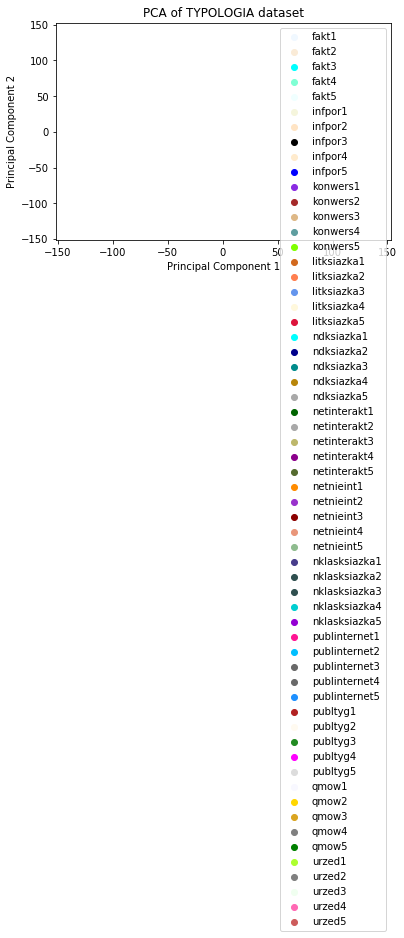

In [104]:
import matplotlib.colors as mcolors
target_names = df.index
#y = target_names
for c, i, target_name in zip(mcolors.CSS4_COLORS, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of TYPOLOGIA dataset')
pl.show()